In [154]:
import pandas as pd
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Fuel_Type,Selling_type,Transmission,Owner,Present_Price,Driven_Miles,Selling_Price
0,Renault Duster,2006.0,CNG,Dealer,Automatic,0.0,13.68,156404.0,5.56
1,NaN,2019.0,CNG,Individual,NaN,2.0,8.46,79369.0,NaN
2,Honda City,2005.0,Diesel,Dealer,Manual,0.0,NaN,60875.0,1.97
3,Kia Seltos,2009.0,Diesel,Individual,Manual,0.0,21.79,51116.0,11.43
4,Ford EcoSport,2008.0,Diesel,Dealer,Manual,0.0,24.75,99211.0,17.64


In [155]:
df.isnull().sum()

Car_Name         15
Year             15
Fuel_Type        15
Selling_type     15
Transmission     15
Owner            15
Present_Price    15
Driven_Miles     15
Selling_Price    15
dtype: int64

In [156]:
df.describe()

,Year,Owner,Present_Price,Driven_Miles,Selling_Price
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2014.259259,1.518519,16.109556,91563.718519,10.450963
std,5.648884,1.105292,8.103910,52717.477819,5.833828
min,2005.000000,0.000000,2.560000,6362.000000,1.340000
25%,2009.000000,1.000000,8.905000,48220.500000,5.345000
50%,2014.000000,2.000000,16.750000,88961.000000,10.130000
75%,2019.000000,2.000000,22.415000,133818.000000,14.835000
max,2023.000000,3.000000,29.720000,199406.000000,22.210000


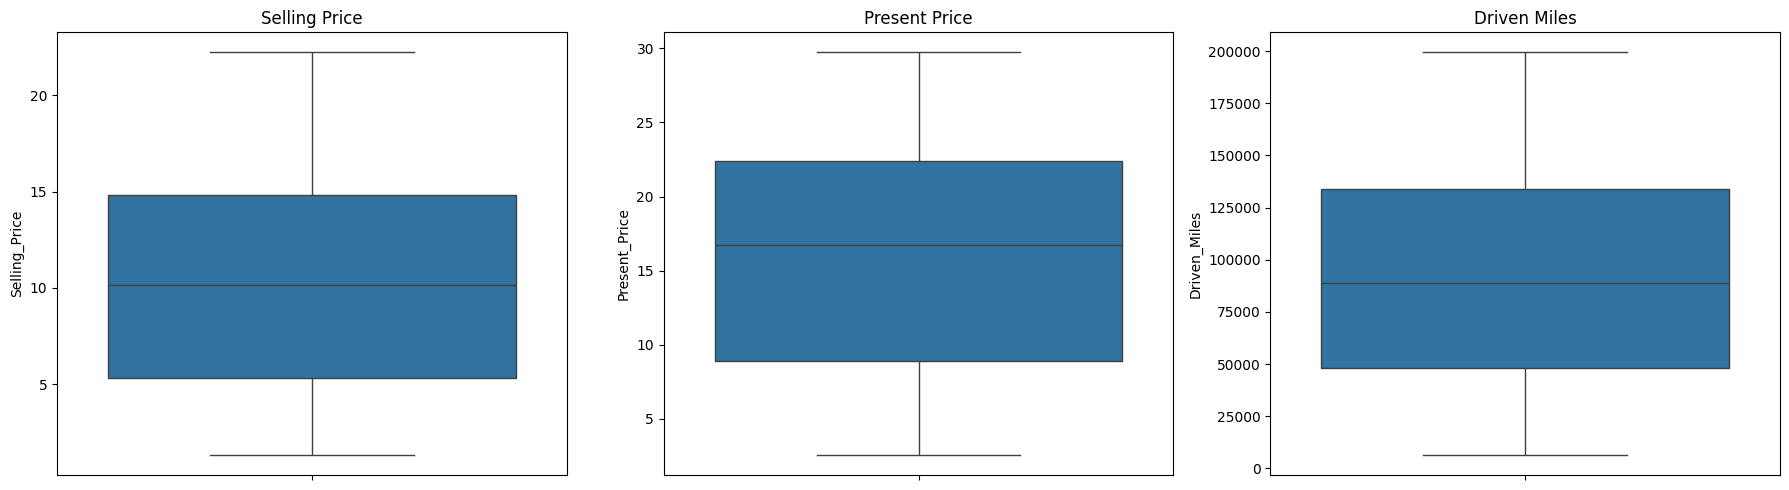

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot for Selling Price in GBP
sns.boxplot(y=df['Selling_Price'], ax=axes[0])
axes[0].set_title('Selling Price')

# Boxplot for Present Price in GBP
sns.boxplot(y=df['Present_Price'], ax=axes[1])
axes[1].set_title('Present Price')

# Boxplot for Driven Miles
sns.boxplot(y=df['Driven_Miles'], ax=axes[2])
axes[2].set_title('Driven Miles')

plt.tight_layout()
plt.show()




In [158]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers in London metrics
numeric_columns = ['Selling_Price', 'Present_Price', 'Driven_Miles']

# Apply the function
df_clean = remove_outliers_iqr(df, numeric_columns)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")


Original dataset shape: (150, 9)
Cleaned dataset shape: (109, 9)


In [159]:
df_clean.shape

(109, 9)

In [160]:
df_clean.describe()

,Year,Owner,Present_Price,Driven_Miles,Selling_Price
count,97.000000,99.000000,109.000000,109.000000,109.000000
mean,2014.061856,1.525253,16.249908,90143.541284,10.599817
std,5.507220,1.081792,8.276951,53014.586366,5.984828
min,2005.000000,0.000000,2.560000,6362.000000,1.340000
25%,2009.000000,1.000000,8.290000,48196.000000,5.390000
50%,2014.000000,2.000000,16.980000,86962.000000,10.130000
75%,2018.000000,2.000000,23.010000,124979.000000,14.970000
max,2023.000000,3.000000,29.720000,199406.000000,22.210000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       135 non-null    object 
 1   Year           135 non-null    float64
 2   Fuel_Type      135 non-null    object 
 3   Selling_type   135 non-null    object 
 4   Transmission   135 non-null    object 
 5   Owner          135 non-null    float64
 6   Present_Price  135 non-null    float64
 7   Driven_Miles   135 non-null    float64
 8   Selling_Price  135 non-null    float64
dtypes: float64(5), object(4)
memory usage: 10.7+ KB


In [162]:
df_clean = pd.get_dummies(df, drop_first=True)
df_clean.head()

,Year,Owner,Present_Price,Driven_Miles,Selling_Price,Car_Name_Honda City,Car_Name_Hyundai i20,Car_Name_Kia Seltos,Car_Name_Mahindra XUV500,Car_Name_Maruti Swift,Car_Name_Renault Duster,Car_Name_Tata Nexon,Car_Name_Toyota Corolla,Car_Name_Volkswagen Polo,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2006.0,0.0,13.68,156404.0,5.56,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2019.0,2.0,8.46,79369.0,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2005.0,0.0,NaN,60875.0,1.97,True,False,False,False,False,False,False,False,False,True,False,False,True
3,2009.0,0.0,21.79,51116.0,11.43,False,False,True,False,False,False,False,False,False,True,False,True,True
4,2008.0,0.0,24.75,99211.0,17.64,False,False,False,False,False,False,False,False,False,True,False,False,True


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separate features and target
x = df_clean.drop('Selling_Price', axis=1)
y = df_clean['Selling_Price']

# Drop rows where y or x has NaN
df_model = pd.concat([x, y], axis=1).dropna()
x = df_model.drop('Selling_Price', axis=1)
y = df_model['Selling_Price']

# One-hot encode categorical columns
x = pd.get_dummies(x, drop_first=True)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [164]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Train R²:", model.score(x_train, y_train))
print("Test R²:", model.score(x_test, y_test))


Train R²: 0.8604111862827278
Test R²: 0.743124966335381


In [165]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.743124966335381

In [166]:
print(x.columns.tolist())


['Year', 'Owner', 'Present_Price', 'Driven_Miles', 'Car_Name_Honda City', 'Car_Name_Hyundai i20', 'Car_Name_Kia Seltos', 'Car_Name_Mahindra XUV500', 'Car_Name_Maruti Swift', 'Car_Name_Renault Duster', 'Car_Name_Tata Nexon', 'Car_Name_Toyota Corolla', 'Car_Name_Volkswagen Polo', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']


In [167]:
import numpy as np

# Initialize all to 0
input_data = [0] * len(x.columns)

# Fill numerical values
input_data[x.columns.get_loc('Year')] = 2016
input_data[x.columns.get_loc('Present_Price')] = 8.5  # GBP
input_data[x.columns.get_loc('Driven_Miles')] = 45000
input_data[x.columns.get_loc('Owner')] = 0

# Set car name (one-hot encoding)
input_data[x.columns.get_loc('Car_Name_Hyundai i20')] = 1

# Set fuel type (one-hot)
input_data[x.columns.get_loc('Fuel_Type_Petrol')] = 1
# For Diesel: input_data[x.columns.get_loc('Fuel_Type_Diesel')] = 1

# Set selling type
input_data[x.columns.get_loc('Selling_type_Individual')] = 1

# Set transmission
input_data[x.columns.get_loc('Transmission_Manual')] = 1

# Convert to 2D array and predict
sample = np.array(input_data).reshape(1, -1)
predicted_price = model.predict(sample)

print(f"Predicted Selling Price: £{predicted_price[0]:,.2f}")



Predicted Selling Price: £3.87


c:\Users\joelj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


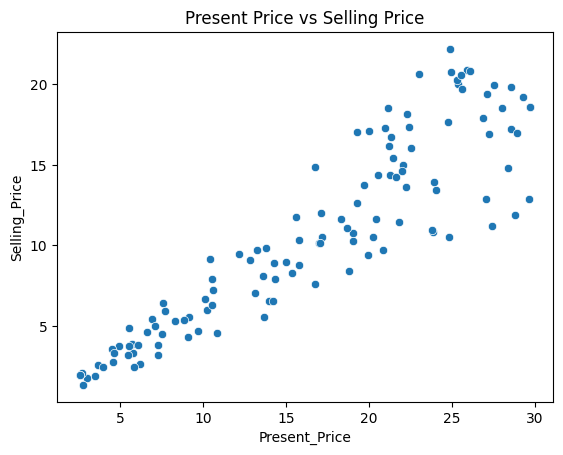

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.title('Present Price vs Selling Price')
plt.show()
